In [ ]:
import random
import numpy as np
population = 10000
days = 365
ill_nr = 1

hospitalization = 0.2
icu = 0.05
mortality = 0.02
asymptomatic = 14
cure = 30
quarantine = 14

family_size = 4
transfer_risk = 0.01
family_risk = 0.5
meet_people = 3

peoples = []
ill_peoples = []

for i in range(population):
    peoples.append(0)
    
for i in range(ill_nr):
    ill_idx = random.randrange(population)
    ill_peoples.append([ill_idx, 0])
    peoples[ill_idx] = 100
print(ill_peoples)

In [ ]:
for d in range(days):                                                    # kolejne dni
    for i, p in enumerate(ill_peoples):                                  # sprawdza chorych
        risk_tab = np.random.rand(meet_people)                           # losuje ryzyko zakażenia (0.0-1.0)
        people_tab = np.random.randint(0, population, size=meet_people)  # losuje spotkania
        for r in range(meet_people):
            if peoples[p[0]] >= 101:                                     # ? hospitalizowani i zmarli nie zarażają ?
                continue
            if risk_tab[r] < transfer_risk:
                if peoples[people_tab[r]] >= 100:                                # nie można zarazić drugi raz
                    continue
                peoples[people_tab[r]] = 100
                ill_peoples.append([people_tab[r], d])
    for p in ill_peoples:        
        if (d - p[1]) == asymptomatic:                         # pojawienie się objawów
            risk_tab = np.random.rand(3)
            if risk_tab[0] < hospitalization:                  # wymaga hospitalizackji
                peoples[p[0]] = 101
            if risk_tab[1] < (icu/hospitalization):            # wymaga OIT
                peoples[p[0]] = 102
            if risk_tab[2] < (mortality/hospitalization):      # zgon
                peoples[p[0]] = 200                
        if ((d - p[1]) == cure) & (peoples[p[0]] != 200):      # wyleczeni
            peoples[p[0]] = 103

    print(d, peoples.count(0), peoples.count(100), peoples.count(101), 
          peoples.count(102), peoples.count(103), peoples.count(200))

100%|████████████████████████████████████████████████████████████████████████████████| 365/365 [07:10<00:00,  1.29it/s]


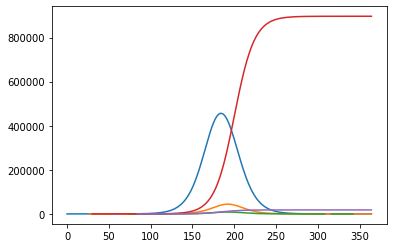

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

population = 1000000
nr_days = 365
ill_nr = 1
meet = 10
transfer_risk = 0.01
asymptomatic = 14
cure = 30
hospitalization = 0.2
icu = 0.05
mortality = 0.02

ill_peoples = {}
result = []

for i in range(ill_nr):
    ill_idx = np.random.randint(0, population, size=1)[0]
    ill_peoples[ill_idx] = [0, 100]

for d in tqdm(range(nr_days)):
    for p in list(ill_peoples.items()):
        if p[1][1] >= 101:
            continue
        risk = np.random.rand(meet)
        idx = np.random.randint(0, population, size=meet)
        for x, (r, i) in enumerate(zip(risk, idx)):
            if i in ill_peoples:
                continue
            if r < transfer_risk:
                ill_peoples[i] = [d, 100]
    for k,v in ill_peoples.items():
        if v[1] == 103:
            pass
        elif ((d - v[0]) == cure) & (v[1] != 200):      # wyleczeni
            v[1] = 103
        elif (d - v[0]) == asymptomatic:
            risk = np.random.rand(1)
            if risk[0] < (mortality):                   # zgon
                v[1] = 200
            elif risk[0] < (icu):                       # wymaga OIT
                v[1] = 102
            elif risk[0] < hospitalization:             # wymaga hospitalizacji
                v[1] = 101
    
    sumary = {}
    for k, v in ill_peoples.items():
        sumary[v[1]] = sumary.get(v[1], 0) + 1
    
    result.append(sumary)
    #print(d, sumary.get(100, 0), sumary.get(101, 0), sumary.get(102, 0), sumary.get(200, 0), sumary.get(103, 0))
    
df = pd.DataFrame(result)
plt.figure()
#plt.legend()
plt.plot(df);